Binary classification
1. formulating the question: Is the species an iris-setosa? we want to answer this question using Binary Classification

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

#De data binnenhalen
train= pd.read_csv('iris_with_outliers.csv')

2. Finding and understanding the data:
using a scatterplot we can see that there are some outliers and with de distplot we can see that the iris setosa is the most common species

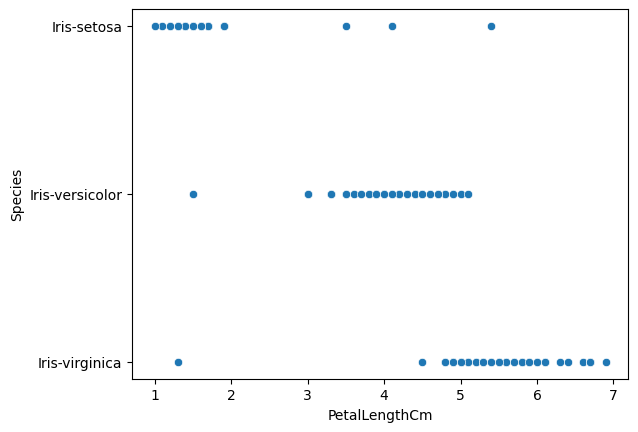

In [3]:
sns.scatterplot(data=train, x="PetalLengthCm", y="Species")
plt.show()

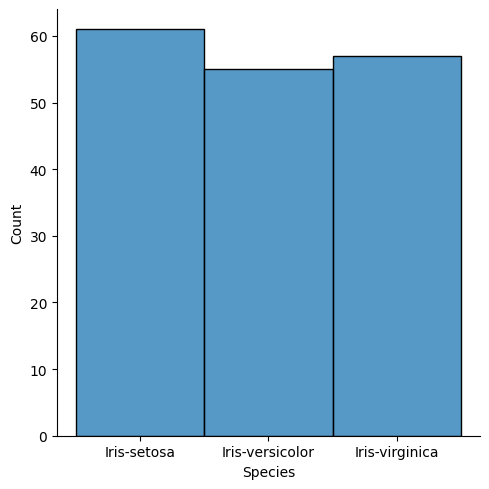

In [4]:
sns.displot(x=train['Species'])

plt.show()

3. Cleaning the Data and Feature Engineering

In [5]:
clean_train = train.drop(['Unnamed: 0', 'Id'],axis=1)

extra_clean_train = clean_train.dropna()
print(extra_clean_train.isna().sum())
X = extra_clean_train.drop('Species', axis=1) # Features
y = extra_clean_train['Species'] # Target variable

# Stap 4: Label Encoding voor de target variabele
extra_clean_train = LabelEncoder()
y = extra_clean_train.fit_transform(y)
 
# Verdeel de data in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


4. Choosing a Model

In [6]:
# Model initialiseren en trainen
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
 
model1 = LogisticRegression()
model1.fit(X_train, y_train)

model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)

c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

5. Tuning and Evaluating


In [7]:
param_grid_model = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_model1 = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

param_grid_model2 = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

param_grid = [
    param_grid_model,
    param_grid_model1,
    param_grid_model2
]

models = [
    model,
    model1,
    model2
]
i = 0
for model in models:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[i], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    # Print the best parameters and the corresponding accuracy score for each model
    print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"Best accuracy score for {type(model).__name__}: {grid_search.best_score_}\n")
    print(cv_scores)
    i += 1


y_pred = model.predict(X_test)
 
# Evalueer de nauwkeurigheid van het model
accuracy = accuracy_score(y_test, y_pred)
print("Nauwkeurigheid van het model:", accuracy)

# Voorspel de testset
y_pred1 = model1.predict(X_test)
 
# Evalueer de nauwkeurigheid van het model
accuracy = accuracy_score(y_test, y_pred1)
print("Nauwkeurigheid van het model:", accuracy)
 
# Voorspel de testset
y_pred2 = model2.predict(X_test)
 
# Evalueer de nauwkeurigheid van het model
accuracy = accuracy_score(y_test, y_pred2)
print("Nauwkeurigheid van het model:", accuracy)

#dus Logistic regression is het meest efficient

Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy score for DecisionTreeClassifier: 0.9153846153846154

[0.76923077 0.92307692 0.96153846 0.92307692 0.84615385]


c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best accuracy score for LogisticRegression: 0.9384615384615385

[0.96153846 0.92307692 0.96153846 0.88461538 0.84615385]
Best parameters for KNeighborsClassifier: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best accuracy score for KNeighborsClassifier: 0.9538461538461538

[0.92307692 0.92307692 1.         0.96153846 0.84615385]
Nauwkeurigheid van het model: 0.9393939393939394
Nauwkeurigheid van het model: 0.9696969696969697
Nauwkeurigheid van het model: 0.9393939393939394


6. Using the Model and Presenting Results


In [8]:
new_observation = [[5.1, 3.5, 1.4, 0.2]]  # Voorbeeld van nieuwe observatie
predicted_species = extra_clean_train.inverse_transform(model1.predict(new_observation))
print("Voorspelde soort voor de nieuwe observatie:", predicted_species)

if predicted_species[0] == 'Iris-setosa':
    print("De voorspelde soort is Iris-setosa.")
else:
    print("De voorspelde soort is niet Iris-setosa.")

Voorspelde soort voor de nieuwe observatie: ['Iris-setosa']
De voorspelde soort is Iris-setosa.


c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Clustering
1. formulating the question: is there a difference between the species? we can find that out by seeing if there are individual clusters.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#De data binnenhalen
train= pd.read_csv('iris_with_outliers.csv')

2. Finding and understanding the data:
using a scatterplot we can see that there are some outliers and with de distplot we can see that the iris setosa is the most common species

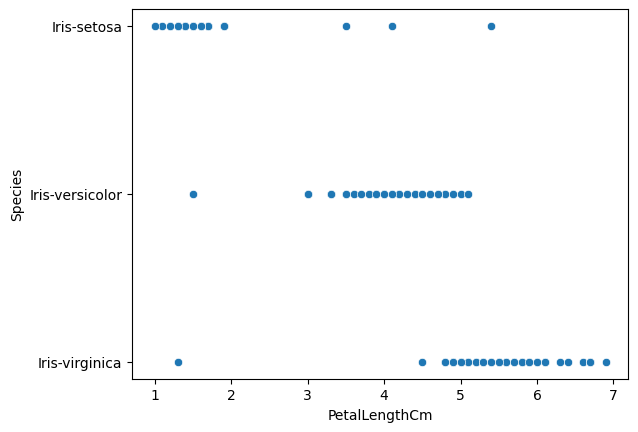

In [10]:
sns.scatterplot(data=train, x="PetalLengthCm", y="Species")
plt.show()

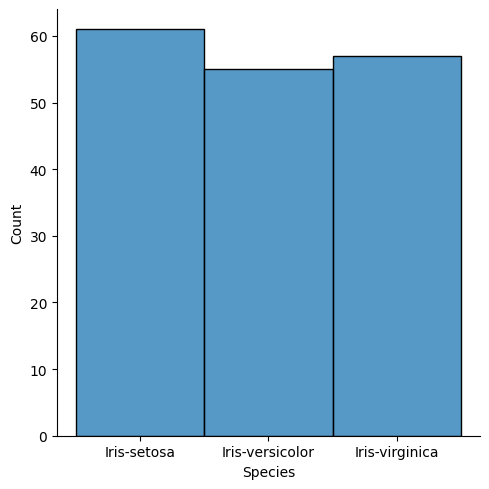

In [11]:
sns.displot(x=train['Species'])

plt.show()

3. cleaning the Data and feature engineering

In [12]:
unlabeled = train.drop(['Species', 'Unnamed: 0', 'Id'], axis=1)
unlabeled
clean_unlabelded = unlabeled.dropna()
print(clean_unlabelded.isna().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


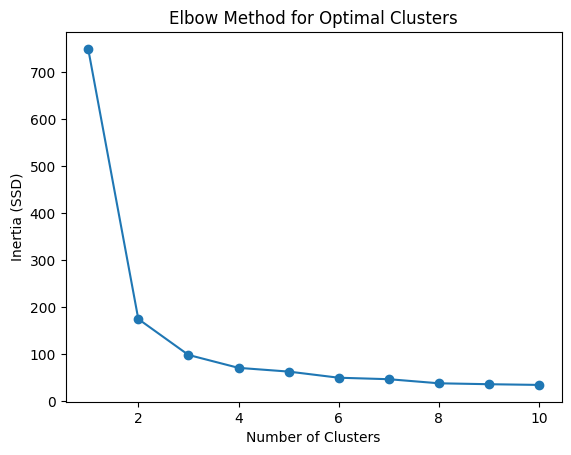

In [13]:
num_clusters = range(1, 11)

# Fit KMeans for each cluster and store the inertia (SSD) in a list
inertia = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clean_unlabelded)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSD)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

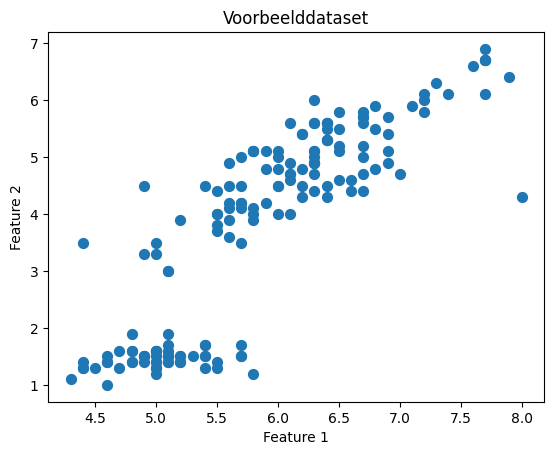

In [14]:
plt.scatter(clean_unlabelded['SepalLengthCm'], clean_unlabelded['PetalLengthCm'], s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Voorbeelddataset")
plt.show()

In [15]:
# Maak een imputer object dat NaN-waarden invult met het gemiddelde van de kolom
imputer = SimpleImputer(strategy='mean')

# Pas de imputer toe op je data
X_imputed = imputer.fit_transform(clean_unlabelded)

# Initialiseer de StandardScaler
scaler = StandardScaler()

# Nu je data geen NaN-waarden meer bevat, kun je deze standaardiseren
X_scaled = scaler.fit_transform(X_imputed)

4. choosing a model

In [16]:
# Kies het aantal clusters (K) - We gebruiken K=3 omdat we weten dat er 3 soorten Iris bloemen zijn
kmeans = KMeans(n_clusters=3, random_state=40)

# Pas K-means clustering toe (na het behandelen van NaN-waarden)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=40)

5.Tuning and evaluating

In [17]:

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],  # You can adjust the range based on your problem
    'init': ['k-means++', 'random'],  # Initialization methods
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'tol': [1e-4, 1e-5, 1e-6],  # Tolerance to declare convergence
    'random_state': [42]  # Set a specific random state for reproducibility
}
grid_search = GridSearchCV(estimator=kmeans,param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
print(f"Best accuracy score for {type(model).__name__}: {grid_search.best_score_}\n")



cv_scores = cross_val_score(kmeans, X_train, y_train, cv=5, scoring='accuracy')
print(cv_scores)

y_pred = kmeans.predict(X_test)
 
# Evalueer de nauwkeurigheid van het model
accuracy = accuracy_score(y_test, y_pred)
print("Nauwkeurigheid van het model:", accuracy)

Best parameters for KNeighborsClassifier: {'init': 'random', 'max_iter': 100, 'n_clusters': 3, 'random_state': 42, 'tol': 0.0001}
Best accuracy score for KNeighborsClassifier: 0.25384615384615383

[0.5        0.88461538 0.46153846 0.5        0.38461538]
Nauwkeurigheid van het model: 0.3333333333333333


c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


6. Using the model and presenting results

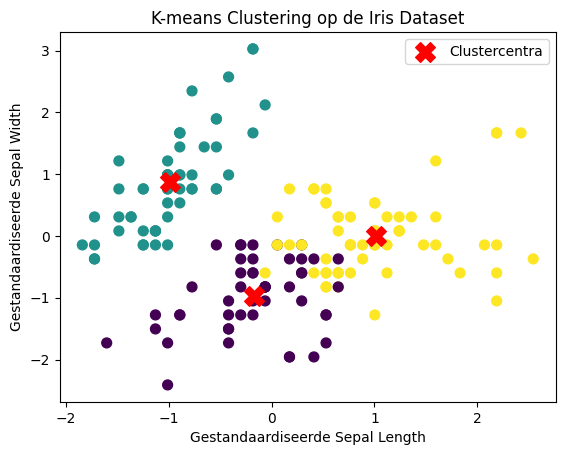

In [18]:
# Krijg de coördinaten van de clustercentra
cluster_centers = kmeans.cluster_centers_

# Visualiseer de resultaten
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Clustercentra')

# Aangezien we aannemen dat de eerste twee features Sepal Length en Sepal Width zijn na standaardisatie
plt.xlabel("Gestandaardiseerde Sepal Length")
plt.ylabel("Gestandaardiseerde Sepal Width")

plt.title("K-means Clustering op de Iris Dataset")
plt.legend()
plt.show()

LINEAR REGRESSION

1. Formulating the question: heeft the breedte invloed op de lengte van de blaadjes?

In [19]:
#import model
from sklearn.linear_model import LinearRegression, Lasso
#De data binnenhalen
train= pd.read_csv('iris_with_outliers.csv')

2. Finding and understanding the data:
using a scatterplot we can see that there are some outliers and with de distplot we can see that the iris setosa is the most common species

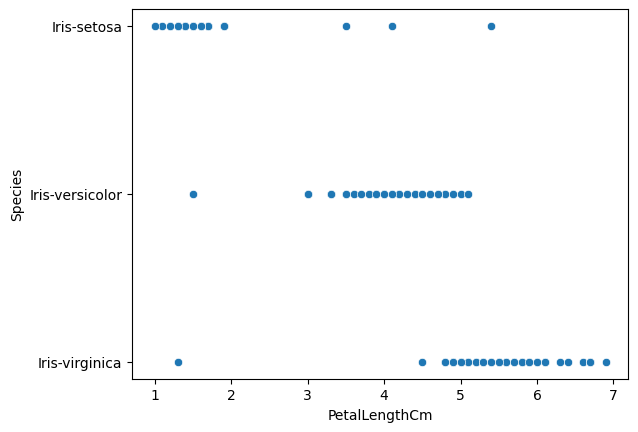

In [20]:
sns.scatterplot(data=train, x="PetalLengthCm", y="Species")
plt.show()

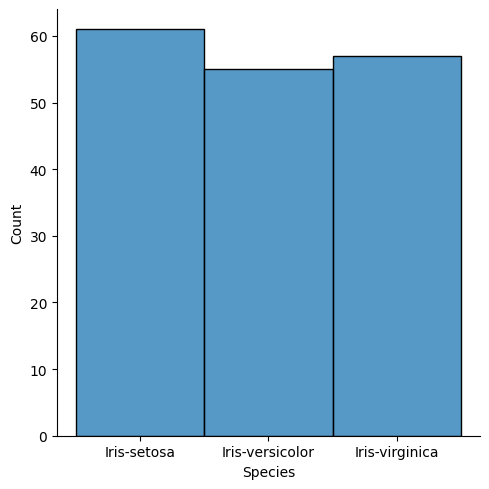

In [21]:
sns.displot(x=train['Species'])

plt.show()

3. cleaning the Data and feature engineering

In [22]:
#Cleaning the data
linear_clean = train.drop(['Unnamed: 0', 'Id'],axis=1)
linear_clean = linear_clean.dropna()

#voor stap drie scroll naar boven
X = linear_clean[['PetalWidthCm']] # Features
y = linear_clean[['PetalLengthCm']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. choosing a model

In [23]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

Lasso = Lasso()
Lasso.fit(X_train, y_train)

Lasso()

5.Tuning and evaluating

In [24]:
param_grid_linreg = {
  'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Lasso Regression parameter grid
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],  
}

param_grid = [
    param_grid_linreg,
    param_grid_lasso
]
models = [
    linreg,
    Lasso,
]
i = 0
for model in models:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[i], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    # Print the best parameters and the corresponding accuracy score for each model
    print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"Best accuracy score for {type(model).__name__}: {grid_search.best_score_}\n")
    print(cv_scores)
    i += 1
y_pred = linreg.predict(X_test)

y_predLasso = Lasso.predict(X_test)

c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self.

Best parameters for LinearRegression: {'copy_X': True, 'fit_intercept': True}
Best accuracy score for LinearRegression: nan

[nan nan nan nan nan]


c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self.

Best parameters for Lasso: {'alpha': 0.01, 'fit_intercept': True}
Best accuracy score for Lasso: nan

[nan nan nan nan nan]


c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jmiou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jmiou\AppData\Local\Programs\Python\Pyth

6.Using the model and presenting results

<function matplotlib.pyplot.show(close=None, block=None)>

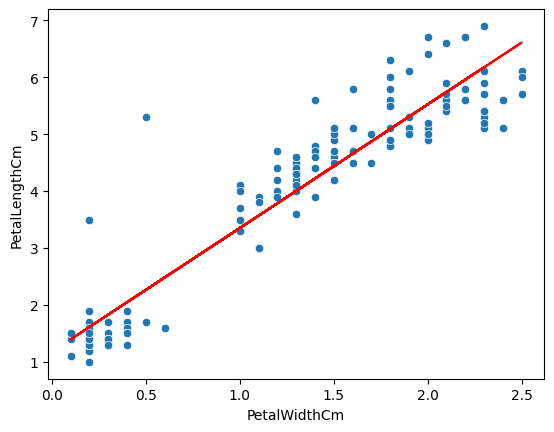

In [25]:
sns.scatterplot(x=train['PetalWidthCm'], y=train['PetalLengthCm'])
plt.plot(X_test, y_pred, color='red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

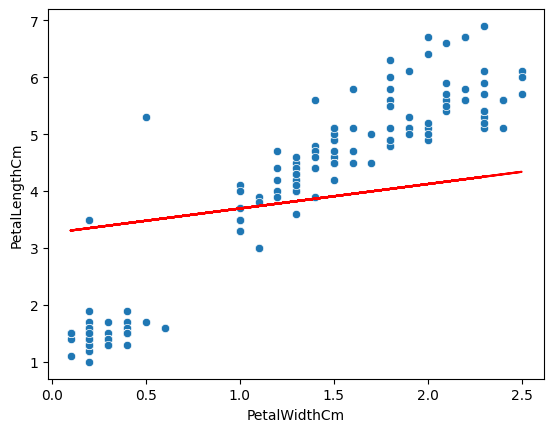

In [26]:
sns.scatterplot(x=train['PetalWidthCm'], y=train['PetalLengthCm'])
plt.plot(X_test, y_predLasso, color='red')
plt.show

MULTICLASS CLASSIFIERS

1.Formulating the question: 

In [27]:
train= pd.read_csv('iris_with_outliers.csv')

2. Finding and understanding the data:
using a scatterplot we can see that there are some outliers and with de distplot we can see that the iris setosa is the most common species

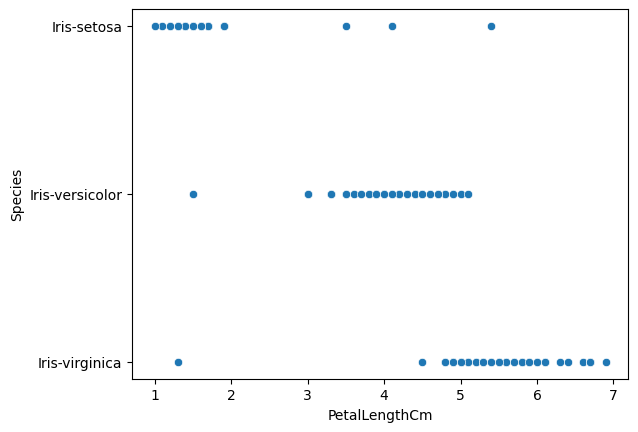

In [28]:
sns.scatterplot(data=train, x="PetalLengthCm", y="Species")
plt.show()

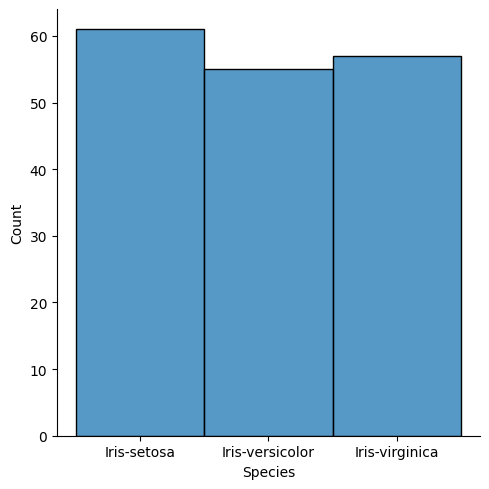

In [29]:
sns.displot(x=train['Species'])
plt.show()

3.Cleaning the data

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Load the dataset (assuming 'Species' column is the target variable)
df = train.drop(['Unnamed: 0', 'Id'], axis=1)

# One-hot encode the 'Species' column
species_encoding = pd.get_dummies(df['Species'], prefix='Species').astype(int)
df = pd.concat([df, species_encoding], axis=1)

# Drop the original 'Species' column
df = df.drop('Species', axis=1)

# Fill missing values with the mean of each numeric column
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Scale the numeric columns using MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Extract features (X) and target variable (y)
X = df.drop(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'], axis=1)
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

4. Choosing a model

In [31]:
from sklearn.ensemble import RandomForestClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

5.Tuning and evaluating

In [32]:
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
param_grid = [
    param_grid_decision_tree,
    param_grid_random_forest
]
models = [
    decision_tree_model,
    random_forest_model
]
i = 0
for model in models:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[i], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    # Print the best parameters and the corresponding accuracy score for each model
    print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"Best accuracy score for {type(model).__name__}: {grid_search.best_score_}\n")
    print(cv_scores)
    i += 1

Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Best accuracy score for DecisionTreeClassifier: 0.9206349206349206

[0.89285714 0.82142857 0.89285714 0.88888889 0.92592593]
Best parameters for RandomForestClassifier: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best accuracy score for RandomForestClassifier: 0.9203703703703704

[0.92857143 0.85714286 0.92857143 0.88888889 0.96296296]


6.Using the model and presenting results

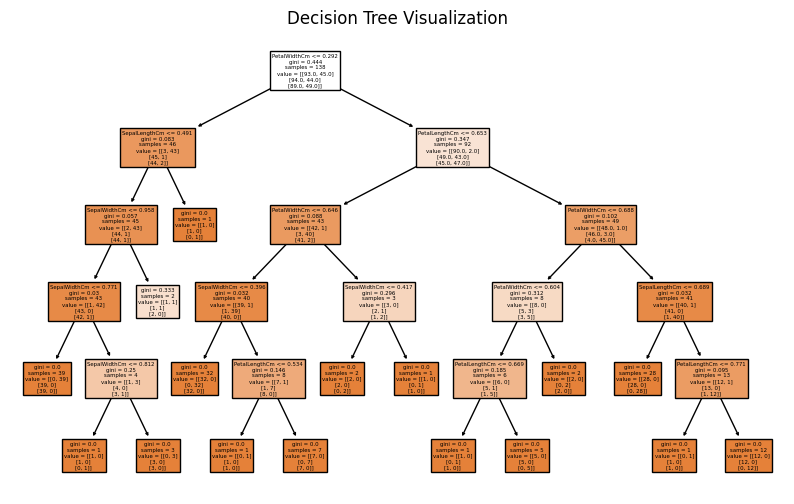

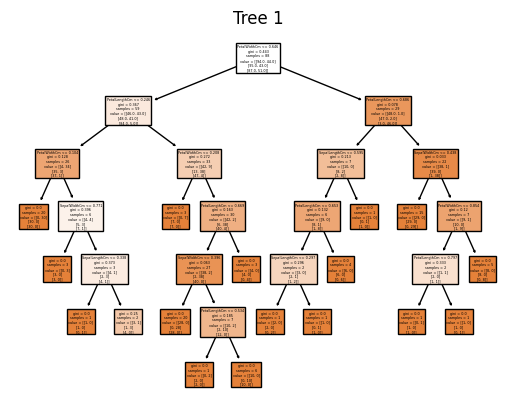

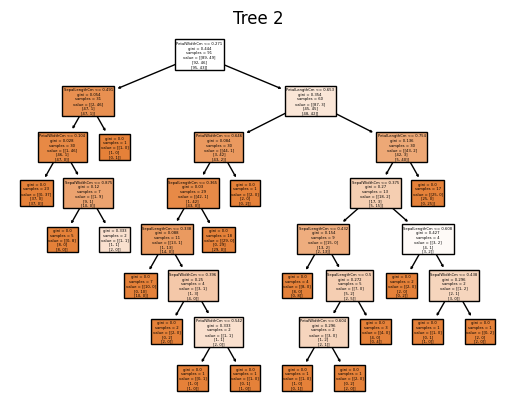

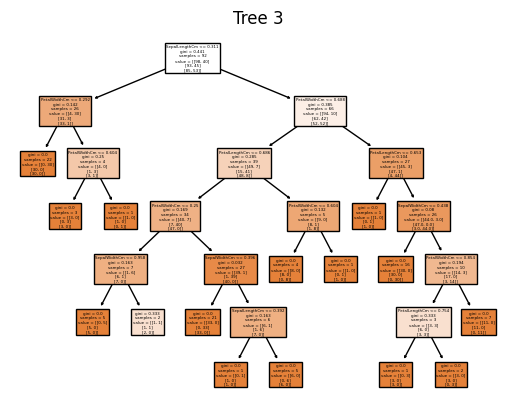

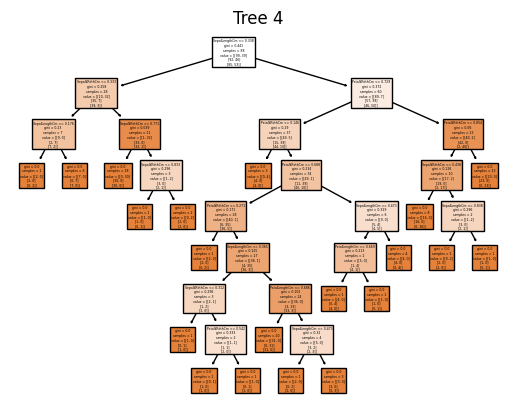

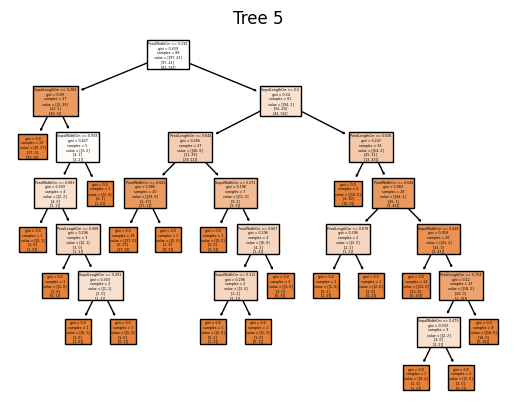

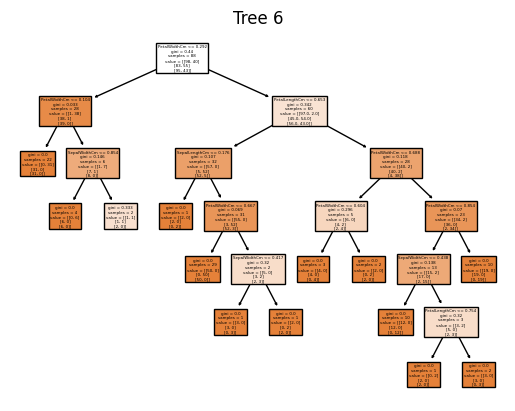

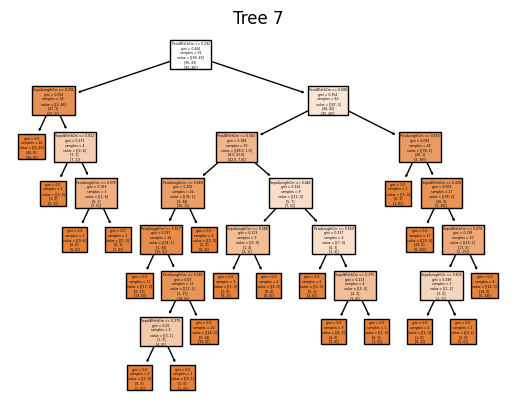

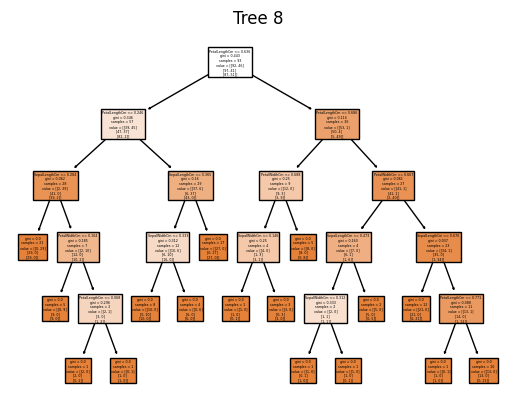

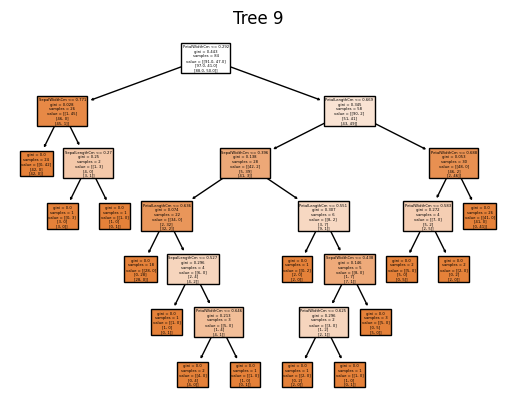

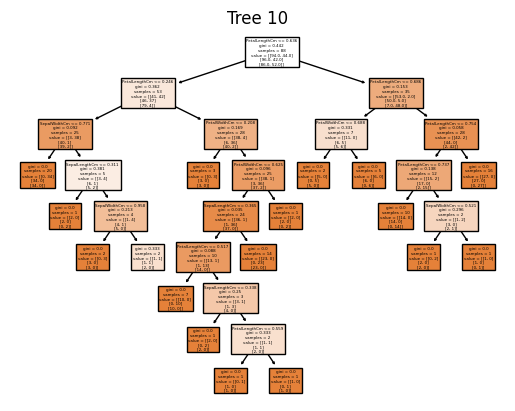

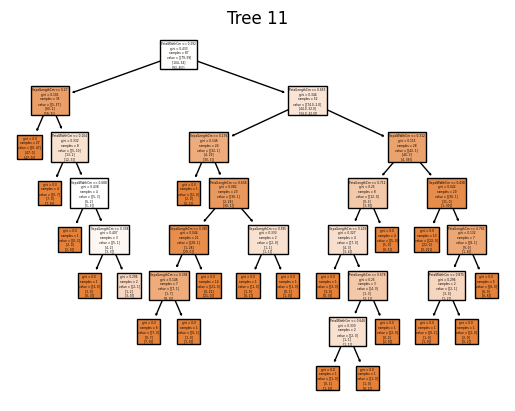

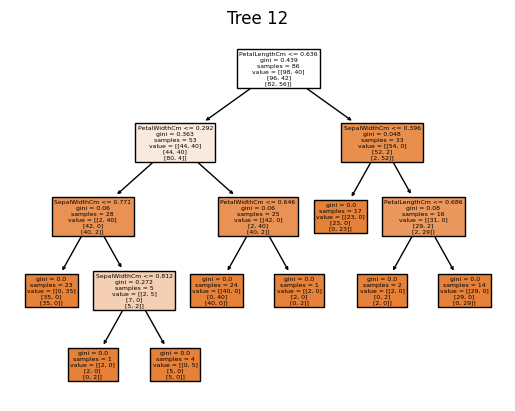

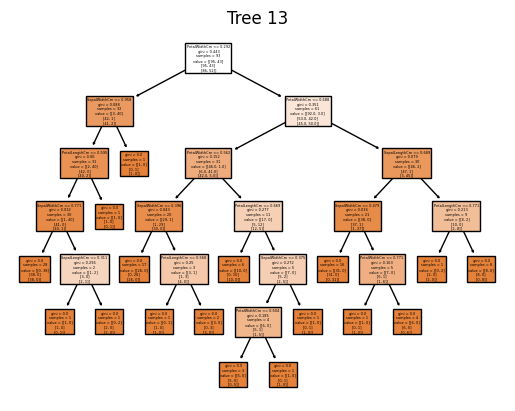

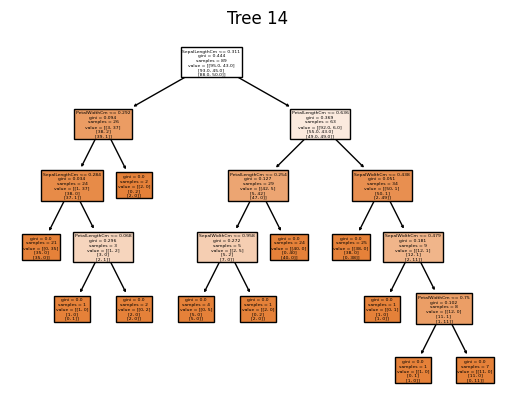

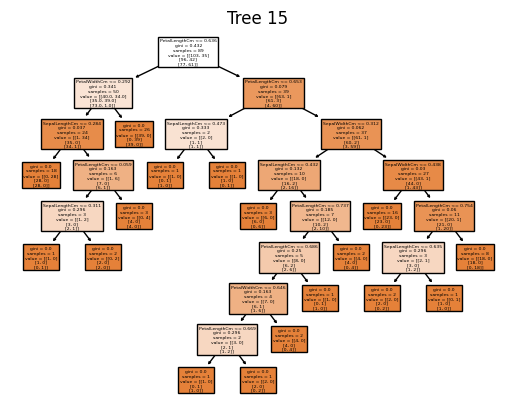

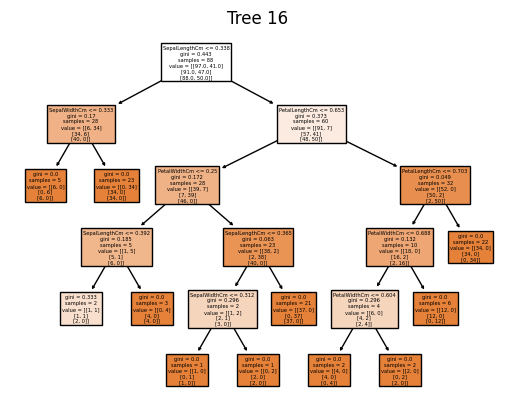

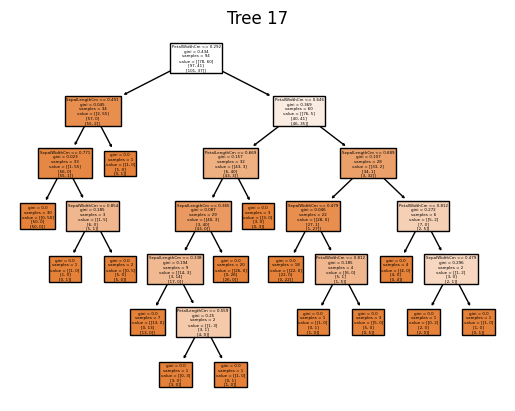

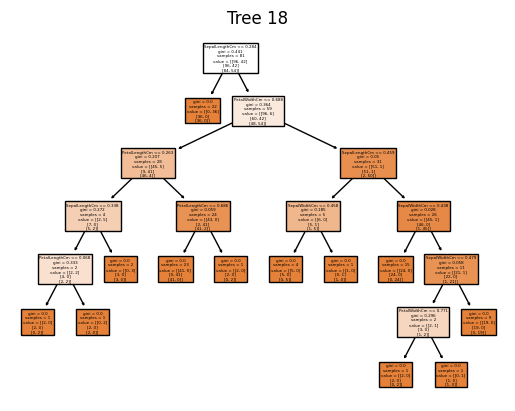

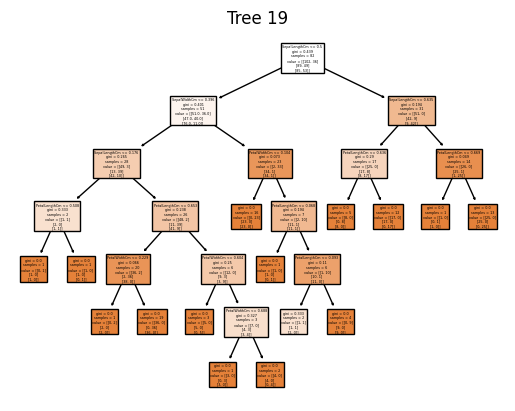

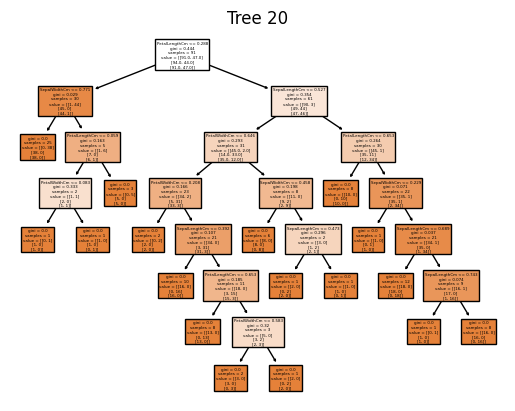

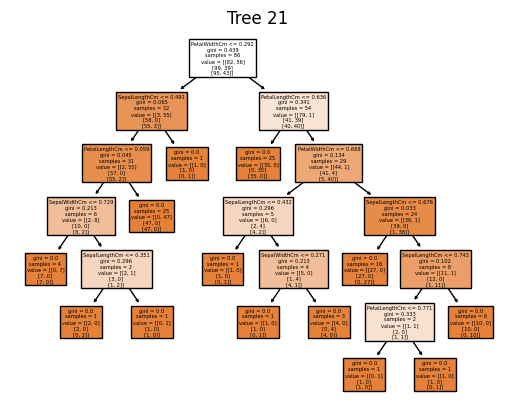

In [38]:
from sklearn.tree import plot_tree


# Visualize Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(decision_tree_model, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.title('Decision Tree Visualization')
plt.show()

#plot forest
for i, estimator in enumerate(model.estimators_):
    plt.figure()
    plot_tree(estimator, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
    plt.title(f'Tree {i+1}')
    plt.show()
    if i == 19:
        break